In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# <center>Computational Mathematics Report</center>
### <center>Donato Meoli</center>
##### <center>d.meoli@studenti.unipi.it</center>

<center>Computational Mathematics course 646AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: Wildcard #5 with Machine Learning</center>
<center>Group #35</center>

## Track

(M1) is a SVC with *hinge* and *squared hinge* losses; *linear*, *polynomial* and *gaussian* kernels.

(A1.1) is the *AdaGrad* algorithm [[1]](#ref-1), a *deflected subgradient method* for solving the SVC in its *primal* formulation with the non-differentiable *hinge* loss and a standard *Gradient Descent* algorithm for the *squared hinge* loss.

(A1.2) is the *Sequential Minimal Optimization* algorithm [[2]](#ref-2) (see [[3]](#ref-3) for improvements), an ad-hoc *active set* method for training a SVM in its *Wolfe dual* formulation.

(A1.3) is the *AdaGrad* algorithm [[1]](#ref-1), a *deflected subgradient method* for solving the SVC in its *Lagrangian dual* formulation.

(M2) is a SVR with *epsilon-insensitive* and *squared epsilon-insensitive* losses; *linear*, *polynomial* and *gaussian* kernels.

(A2.1) is the *AdaGrad* algorithm [[1]](#ref-1), a *deflected subgradient method* for solving the SVR in its *primal* formulation with the non-differentiable *epsilon-insensitive* loss and a standard *Gradient Descent* algorithm for the *squared epsilon-insensitive* loss.

(A2.2) is the *Sequential Minimal Optimization* algorithm [[4]](#ref-4) (see [[5]](#ref-5) for improvements), an ad-hoc *active set method* for training a SVM in its *Wolfe dual* formulation.

(A2.3) is the *AdaGrad* algorithm [[1]](#ref-1), a *deflected subgradient method* for solving the SVR in its *Lagrangian dual* formulation.

## Abstract

The aim of this report is to compare the *primal*, the *Wolfe dual* and the *Lagrangian dual* formulations of a learning model known as *Support Vector Machine* in terms of *numerical precision*, *time*, *accuracy* and *complexity*.

Firstly, we will provide a detailed mathematical derivation of the SVM model for the *classification* and the *regression* problem for all the mentioned formulations, then, for each of there, we will describe an algorithm to solve the optimization problem that arises from the formulation of the problem.

Finally, we will show some experiments for *linearly* and *nonlinearly* separable generated datasets to compare the performace of different *kernel* functions, also by comparing the custom results with *sklearn* SVM implementation and *cvxopt* QP solver.

## Support Vector Machines

A *support vector machine* constructs a hyperplane or set of hyperplanes in a high or infinite dimensional space, which can be used for *classification* or *regression*. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training data points of any class, since in general the larger the margin the lower the generalization error of the classifier.

### Support Vector Classifier

#### Linearly Separable Binary Classification

Given $n$ training points, where each input $x_i$ has $m$ attributes (i.e., is of dimensionality $m$) and is in one of two classes $y_{i}=\pm1$, i.e our training data is of the form:

$$
\{x_i,y_{i}\} \ \text{where} \ i=1, \dots, n, x_i\in\Re^{m}, y_{i}\in\{+1,-1\}
$$

we assume the data is linearly separable, meaning that we can draw a line on a graph of $x_{1}$ vs $x_{2}$ separating the two classes when $m=2$ and a hyperplane on graphs of $x_{1}, x_{2}$, $\dots$, $x_{m}$ for when $m>2$.

This hyperplane can be described by $\langle w, x \rangle +b=0$ where $w$ is normal to the hyperplane and $\displaystyle \frac{b}{\Vert w\Vert}$ is the perpendicular distance from the hyperplane to the origin.

Support vectors are the examples closest to the separating hyperplane and the aim of support vector machines is to orientate this hyperplane in such a way as to be as far as possible from the closest members of both classes.

<img src="./img/svc_hard.png" width=600/>

Referring to this figure, implementing a SVM boils down to selecting the variables $w$ and $b$ so that our training data can be described by:

$$
\begin{equation}
    \langle w, x_i \rangle +b\geq+1 \ \text{for} \ y_{i}=+1 \tag{1.1}
\end{equation}
$$
$$
\begin{equation}
    \langle w, x_i \rangle +b\leq-1 \ \text{for} \ y_{i}=-1 \tag{1.2}
\end{equation}
$$ 

These equations can be combined into:

$$
\begin{equation}
    y_{i}(\langle w, x_i \rangle +b) \geq 1 \ \forall_{i} \tag{1.3}
\end{equation}
$$ 

If we now just consider the points that lie closest to the separating hyperplane, i.e., the support vectors (shown in circles in the diagram), then the two planes $H_{1}$ and $H_{2}$ that these points lie on can be described by:

$$
\begin{equation}
    \langle w, x_i \rangle +b=+1 \ \text{for} \ H_{1} \tag{1.4}
\end{equation}
$$ 
$$
\begin{equation}
    \langle w, x_i \rangle +b=-1 \ \text{for} \ H_{2} \tag{1.5}
\end{equation}
$$ 

Referring to the previous figure, we define $d_{1}$ as being the distance from $H_{1}$ to the hyperplane and $d_{2}$ from $H_{2}$ to it. The hyperplane's equidistance from $H_{1}$ and $H_{2}$ means that $d_{1}=d_{2}-$ a quantity known as the SVM's margin. In order to orientate the hyperplane to be as far from the support vectors as possible, we need to maximize this margin.

Simple vector geometry shows that the margin is equal to $\displaystyle \frac{1}{\Vert w\Vert}$ and maximizing it subject to the constraint in (1.3) is equivalent to finding:

$$
\begin{equation}
    \begin{aligned}
        \min_{w,b} \quad & \Vert w \Vert \\
            \textrm{subject to} \quad & y_{i}(\langle w, x_i \rangle +b) \geq 1 \ \forall_{i}
    \end{aligned} \tag{1.6}
\end{equation}
$$

Minimizing $\Vert w\Vert$ is equivalent to minimizing $\displaystyle \frac{1}{2}\Vert w\Vert^{2}$, so we need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{w,b} \quad & \frac{1}{2} \Vert w \Vert^2 \\
            \textrm{subject to} \quad & y_{i}(\langle w, x_i \rangle +b) \geq 1 \ \forall_{i}
    \end{aligned} \tag{1.7}
\end{equation}
$$

This optimization problem can be equivalently formulated as: 

$$
\begin{equation}
    \min_{w,b} \frac{1}{2} \Vert w \Vert^2 + \sum_{i=1}^n \max(0, y_i (\langle w, x_i \rangle + b)) \tag{1.8a}
\end{equation}
$$

where we make use of the *Hinge* (L1) loss. 

To simplify the notation so also the algorithms the bias term $b$ is handled by augmenting the vector $w$ and each instance $x_i$ with an additional dimension:

$$
w^T \leftarrow [w^T, b] \\
x_i^T \leftarrow [x_i^T, 1]
$$

So, we can rewrite the (1.8a) as follows:

$$
\begin{equation}
    \min_{w} \frac{1}{2} \Vert w \Vert^2 + \sum_{i=1}^n \max(0, y_i \langle w, x_i \rangle) \tag{1.8b}
\end{equation}
$$

Please notice that in terms of numerical optimization the formulation (1.8b) is not equivalent to the (1.8a), but in machine learning sense, numerical experiments in [[6]](#ref-6) show that the accuracy does not vary much when the bias term $b$ is embedded into the weight vector $w$. This approach is equivalent to adding a constant feature to the training data and finding a separating hyperplane
passing through the origin.

Since the Hinge loss arise to a non-differentiable optimization problem due its non-smoothness in zero, i.e., consider a model training on sparse features, we should use a *subgradient* method which takes this into account. So, given a decreasing learning rate, we might end up in a situation where the parameters for common features converge rather quickly to their optimal values, whereas for infrequent features we are still short of observing them sufficiently frequently before their optimal values can be determined. In other words, the learning rate either decreases too quickly for frequent features or too slowly for infrequent ones.

A possible hack to redress this issue would be to count the number of times we see a particular feature and to use this as a clock for adjusting learning rates. That is, rather than choosing a learning rate of the form $\displaystyle \eta = \frac{\eta_0}{\sqrt{t + c}}$ we could use $\displaystyle \eta_i = \frac{\eta_0}{\sqrt{s(i, t) + c}}$. Here $s(i, t)$ counts the number of nonzeros for feature $i$ that we have observed up to time $t$. This is actually quite easy to implement at no meaningful overhead. However, it fails whenever we do not quite have sparsity but rather just data where the gradients are often very small and only rarely large. After all, it is unclear where one would draw the line between something that qualifies as an observed feature or not.

*AdaGrad* [[1]](#ref-1) addresses this by replacing the rather crude counter $s(i, t)$ by an aggregate of the squares of previously observed gradients. In particular, it uses $s(i, t+1) = s(i, t) + \left(\partial_i f(x)\right)^2$ as a means to adjust the learning rate. This has two benefits: first, we no longer need to decide just when a gradient is large enough. Second, it scales automatically with the magnitude of the gradients. Coordinates that routinely correspond to large gradients are scaled down significantly, whereas others with small gradients receive a much more gentle treatment.

Let us formalize the discussion from above. We use the variable $s_t$ to accumulate past gradient variance as follows:

$$
\begin{split}
    \begin{aligned}
        {g}_t & = \partial_{{w}} l(y_t, f({x}_t, {w})) \\
        {s}_t & = {s}_{t-1} + {g}_t^2 \\
        {w}_t & = {w}_{t-1} - \frac{\eta}{\sqrt{{s}_t + \epsilon}} \cdot {g}_t
    \end{aligned}
\end{split}
$$

where $\epsilon$ is an additive constant that ensures that we do not divide by 0. 

In [ ]:
from optiml.ml.svm import PrimalSVC
from optiml.ml.svm.losses import hinge, squared_hinge
from optiml.ml.utils import generate_linearly_separable_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad, StochasticGradientDescent
from optiml.opti.utils import plot_trajectory_optimization

from sklearn.svm import LinearSVC as SKLinearSVC
from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	 1.0000e+00 - val_loss:  1.0000e+00 - acc:  0.5259 - val_acc:  0.5333
  50	  50	 4.2715e-02 - val_loss:  3.2878e-02 - acc:  1.0000 - val_acc:  1.0000
 100	 100	 3.3280e-02 - val_loss:  4.1398e-02 - acc:  1.0000 - val_acc:  1.0000
 150	 150	 2.9370e-02 - val_loss:  4.7099e-02 - acc:  1.0000 - val_acc:  1.0000
 200	 200	 2.7348e-02 - val_loss:  5.1647e-02 - acc:  1.0000 - val_acc:  1.0000
 250	 250	 2.6310e-02 - val_loss:  5.4830e-02 - acc:  1.0000 - val_acc:  1.0000
 300	 300	 2.5434e-02 - val_loss:  5.7787e-02 - acc:  1.0000 - val_acc:  1.0000
 350	 350	 2.4580e-02 - val_loss:  6.0797e-02 - acc:  1.0000 - val_acc:  1.0000
 400	 400	 2.3891e-02 - val_loss:  6.3598e-02 - acc:  1.0000 - val_acc:  1.0000
 450	 450	 2.3665e-02 - val_loss:  6.5090e-02 - acc:  1.0000 - val_acc:  1.0000
 500	 500	 2.3446e-02 - val_loss:  6.6598e-02 - acc:  1.0000 - val_acc:  1.0000
 550	 550	 2.3235e-02 - val_loss:  6.8127e-02 - acc:  1.0000 - val_acc:  1.0000
 600	 600	 2.3029e-02 

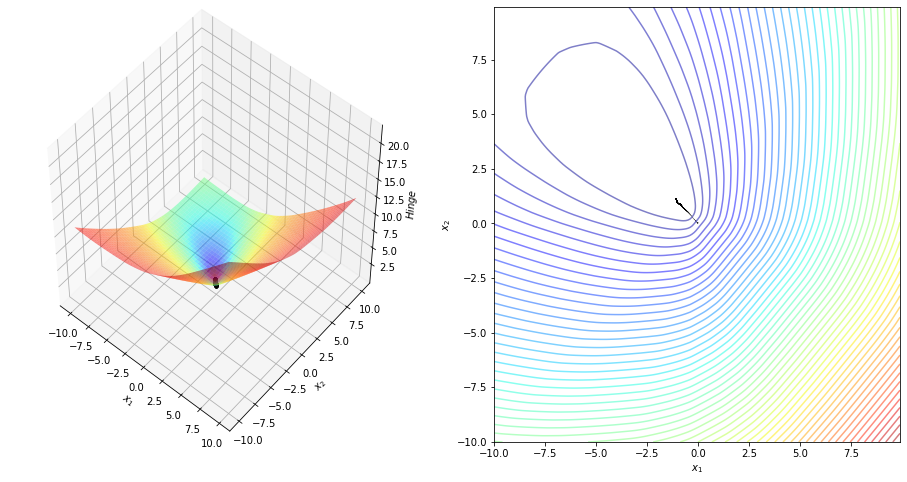

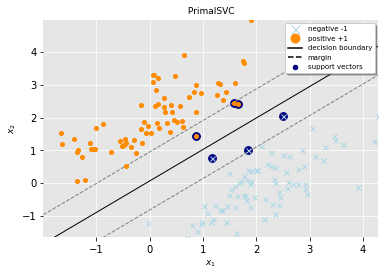

svc accuracy score is 1.0
svc found 6 support vectors from 150 examples
svc w is [-1.08438711  1.12889381]
svc b is -0.07438469635850974

CPU times: user 2.33 ms, sys: 0 ns, total: 2.33 ms
Wall time: 4.37 ms


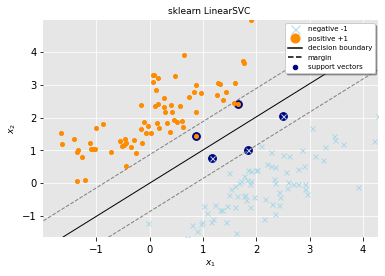

sklearn svc accuracy score is 1.0
sklearn svc found 5 support vectors from 150 examples
sklearn svc w is [[-1.16379008  1.15039858]]
sklearn svc b is [0.0016301]


In [5]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=hinge, optimizer=AdaGrad, learning_rate=0.1, 
                validation_split=0.1, verbose=50)
%time svc.fit(X_train, y_train)
plot_trajectory_optimization(svc.loss, svc.optimizer, -10, 10, -10, 10)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = SKLinearSVC(loss='hinge')
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'sklearn svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

To provide a continuously differentiable function the optimization problem (1.8b) can be formulated as:

$$
\begin{equation}
    \min_{w} \frac{1}{2} \Vert w \Vert^2 + \sum_{i=1}^n \max(0, y_i \langle w, x_i \rangle)^2 \tag{1.8c}
\end{equation}
$$

where we make use of the *squared Hinge* (L2) loss.

epoch	iter	 cost	
   0	   0	 1.0000e+00 - val_loss:  1.0000e+00 - acc:  0.4815 - val_acc:  0.4000
  50	  50	 1.1870e-02 - val_loss:  7.0373e-02 - acc:  1.0000 - val_acc:  1.0000
 100	 100	 1.2248e-02 - val_loss:  8.6860e-02 - acc:  1.0000 - val_acc:  1.0000
 150	 150	 1.2863e-02 - val_loss:  9.4973e-02 - acc:  1.0000 - val_acc:  1.0000
 200	 200	 1.3400e-02 - val_loss:  9.9590e-02 - acc:  1.0000 - val_acc:  1.0000
 250	 250	 1.3600e-02 - val_loss:  1.0323e-01 - acc:  1.0000 - val_acc:  1.0000
 300	 300	 1.3815e-02 - val_loss:  1.0681e-01 - acc:  1.0000 - val_acc:  1.0000
 350	 350	 1.4044e-02 - val_loss:  1.1032e-01 - acc:  1.0000 - val_acc:  1.0000
 400	 400	 1.4284e-02 - val_loss:  1.1378e-01 - acc:  1.0000 - val_acc:  1.0000
 450	 450	 1.4533e-02 - val_loss:  1.1717e-01 - acc:  1.0000 - val_acc:  1.0000
 500	 500	 1.4781e-02 - val_loss:  1.2039e-01 - acc:  1.0000 - val_acc:  1.0000
 550	 550	 1.5018e-02 - val_loss:  1.2354e-01 - acc:  1.0000 - val_acc:  1.0000
 600	 600	 1.5288e-02 

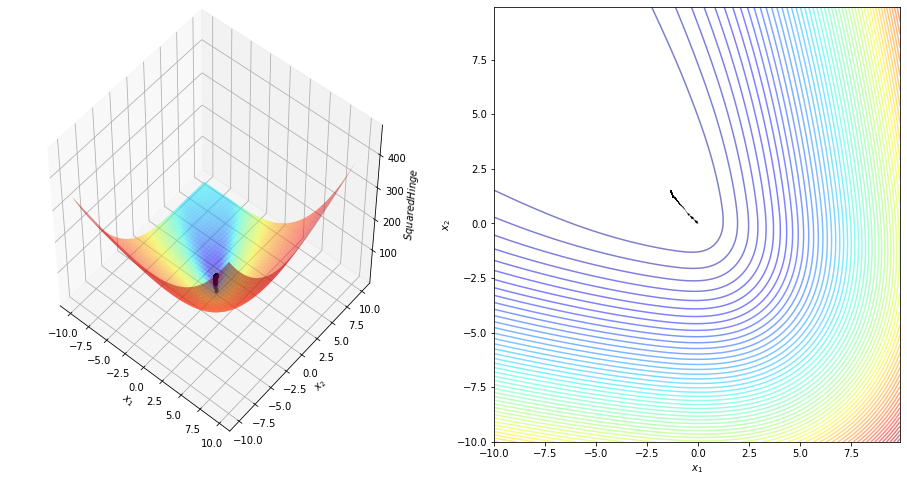

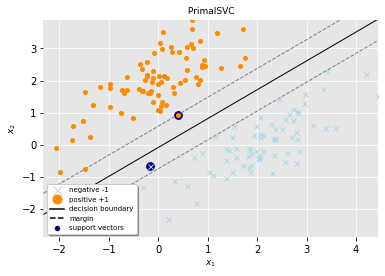

svc accuracy score is 1.0
svc found 2 support vectors from 150 examples
svc w is [-1.3561762   1.51029332]
svc b is 0.12394448891953086

CPU times: user 916 µs, sys: 134 µs, total: 1.05 ms
Wall time: 1.07 ms


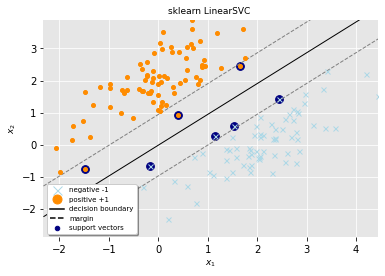

sklearn svc accuracy score is 1.0
sklearn svc found 7 support vectors from 150 examples
sklearn svc w is [[-1.00289252  1.04647549]]
sklearn svc b is [0.01210417]


In [6]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=squared_hinge, optimizer=StochasticGradientDescent, 
                learning_rate=0.1, validation_split=0.1, verbose=50)
%time svc.fit(X_train, y_train)
plot_trajectory_optimization(svc.loss, svc.optimizer, -10, 10, -10, 10)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = SKLinearSVC(loss='squared_hinge')
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'sklearn svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

In order to cater for the constraints in this minimization, we need to allocate them Lagrange multipliers $\alpha$, where $\alpha_{i}\geq 0 \ \forall_{i}$:

$$
\begin{align*}
    \mathcal{W}(w,b,\alpha) \displaystyle &= \frac{1}{2}\Vert w\Vert^{2}-\alpha[y_{i}(\langle w, x_i \rangle +b)-1 \ \forall_{i}] \tag{1.9} \\
    &= \displaystyle \frac{1}{2}\Vert w\Vert^{2}-\sum_{i=1}^{n}\alpha_{i}[y_{i}(\langle w, x_i \rangle +b)-1] \tag{1.10} \\
    &= \displaystyle \frac{1}{2}\Vert w\Vert^{2}-\sum_{i=1}^{n}\alpha_{i}y_{i}(\langle w, x_i \rangle +b)+\sum_{i=1}^{n}\alpha_{i} \tag{1.11}
\end{align*}
$$

We wish to find the $w$ and $b$ which minimizes, and the $\alpha$ which maximizes $\mathcal{W}$ (whilst keeping $\alpha_{i}\geq 0 \ \forall_{i}$). We can do this by differentiating $\mathcal{W}$ with respect to $w$ and $b$ and setting the derivatives to zero:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}\alpha_{i}y_i x_i \tag{1.12}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial b}=0\Rightarrow\sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.13}
\end{equation}
$$

Substituting (1.12) and (1.13) into (1.11) gives a new formulation which, being dependent on $\alpha$, we need to maximize:

$$
\begin{align*}
    \mathcal{W}(\alpha) \displaystyle &= \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i,j}\alpha_{i}\alpha_{j}y_{i}y_{j} \langle x_i, x_j \rangle \ \text{subject to} \ \alpha_{i}\geq 0 \ \forall_{i}, \displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.14} \\
    &= \displaystyle \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i,j}\alpha_{i}Q_{ij}\alpha_{j} \ \text{where} \ Q_{ij} = y_{i}y_{j} \langle x_{i}, x_{j} \rangle \tag{1.15} \\
    &= \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\alpha^{T}Q\alpha \ \text{subject to} \ \alpha_{i}\geq 0 \ \forall_{i}, \displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.16}
\end{align*}
$$

This new formulation $\mathcal{W}$ is referred to as the *Wolfe dual* form of the *primary* formulation. It is worth noting that the dual form requires only the dot product of each input vector $x_{i}$ to be calculated, this is important for the *kernel trick* discussed later.

Having moved from minimizing $\mathcal{W}(w,b,\alpha)$ to maximizing $\mathcal{W}(\alpha)$, we need to minimize:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2} \alpha^{T}Q\alpha-q^T\alpha \\
            \textrm{subject to} \quad & \alpha_{i}\geq 0 \ \forall_{i} \\ & y^T\alpha=0
    \end{aligned} \tag{1.17}
\end{equation}
$$

where $q$ is a vector of all ones.

This is a convex quadratic optimization problem, and we run a QP solver which will return $\alpha$ and from (1.12) will give us $w$. What remains is to calculate $b.$

Any data point satisfying (1.13) which is a support vector $x_{s}$ will have the form:

$$y_{s}(\langle w, x_{s} \rangle +b)=1$$

Substituting in (1.12):

$$y_{s}(\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle +b)=1$$

Where $S$ denotes the set of indices of the support vectors. $S$ is determined by finding the indices $i$ where $\alpha_{i}>0$. Multiplying through by $y_{s}$ and then using $y_{s}^{2}=1$ from (1.1) and (1.2):

$$y_{s}^{2}(\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle +b)=y_{s}$$
$$b=y_{s}-\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle$$

Instead of using an arbitrary support vector $x_{s}$, it is better to take an average over all of the support vectors in $S$:

$$
\begin{equation}
    b=\displaystyle \frac{1}{N_{s}}\sum_{s\in S}(y_{s}-\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle) \tag{1.18}
\end{equation}
$$

We now have the variables $w$ and $b$ that define our separating hyperplane's optimal orientation and hence our support vector machine. Each new point $x'$ is classified by evaluating:

$$
\begin{equation}
    y'=\displaystyle \operatorname{sgn}(\sum_{i=1}^{n}\alpha_i y_i\langle x_{i}, x' \rangle+b) \tag{1.19}
\end{equation}
$$

The minimization problem (1.17) can be solved using common quadratic programming methods. However, it can be computationally expensive to use QP algorithms, especially since the gram matrix $Q$ may be too large to be stored in memory. Using a decomposition method instead can speed up the computation and avoid running out of memory.

*Decomposition methods* (also called *chunking* and *working set* methods) separate all observations into two disjoint sets: the working set and the remaining set. A decomposition method modifies only the elements in the working set in each iteration. Therefore, only some columns of the gram matrix are needed in each iteration, which reduces the amount of storage needed for each iteration.

The *Sequential minimal optimization* (SMO) [[2]](#ref-2) method is the most popular approach for solving SVM problems. SMO performs a series of two-point optimizations since we have only one equality constraint $y^T \alpha=0$. At each iteration, a working set of two points are chosen based on a selection rule that uses second-order information. Then the Lagrange multipliers for this working set are solved analytically as follows: first, we initialize $\alpha = 0$, which is a feasible point, since we have $\alpha_{i}\geq 0$ and $y^T \alpha=0$. At each iteration, a working set ${\alpha_i, \alpha_j}$ is selected and the quadratic objective function is minimized along the line $y^T \alpha=0$. Then, the new values for $\alpha_i$ and $\alpha_j$ are clipped to be $\geq 0$ in order to meet the inequality constraint as well.
    
Since the KKT conditions are sufficient for optimality, $\alpha$ is optimal as soon as the conditions are satisfied. In practice, one usually tests whether the largest KKT violation falls below some predefined threshold. If so, the method stops; otherwise, the next iteration starts.

Since the SMO method is designed to deal the equality constraint explicitly we will make use of the formulation (1.17) but, for completeness reasons, we report below the bounded dual formulation that arises from the primal (1.8b) where the bias term $b$ is embedded into the weight vector $w$:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2} \alpha^{T}(Q + yy^T)\alpha-q^T\alpha \\
            \textrm{subject to} \quad & \alpha_{i}\geq 0 \ \forall_{i}
    \end{aligned} \tag{1.20}
\end{equation}
$$

where $q$ is a vector of all ones.

In [7]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.smo import SMOClassifier
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import generate_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

iter	 cost
   0	-1.1394e+00
   1	-2.0679e+00
   2	-2.3172e+00
   3	-2.3602e+00
   4	-2.3616e+00
   5	-2.3618e+00
   6	-2.3618e+00

CPU times: user 60.1 ms, sys: 46.6 ms, total: 107 ms
Wall time: 32.8 ms


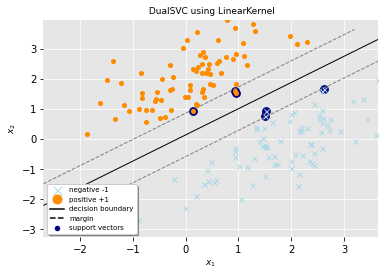

svc accuracy score is 1.0
svc found 6 support vectors from 150 examples
svc w is [-1.20596117  1.3855456 ]
svc b is -0.19830727810894563

     pcost       dcost       gap    pres   dres
 0: -1.7049e+01 -2.8546e+02  1e+03  3e+00  6e-15
 1: -8.8219e+00 -1.4836e+02  3e+02  3e-01  3e-15
 2: -1.1737e+00 -1.9005e+01  3e+01  2e-02  4e-15
 3: -1.1924e+00 -6.3072e+00  6e+00  6e-03  2e-15
 4: -1.5403e+00 -3.9560e+00  3e+00  2e-03  1e-15
 5: -2.0588e+00 -2.9833e+00  1e+00  2e-04  1e-15
 6: -2.2131e+00 -2.5488e+00  3e-01  2e-05  1e-15
 7: -2.3495e+00 -2.3820e+00  3e-02  1e-06  1e-15
 8: -2.3621e+00 -2.3685e+00  6e-03  2e-07  1e-15
 9: -2.3652e+00 -2.3653e+00  1e-04  2e-09  1e-15
10: -2.3652e+00 -2.3652e+00  1e-06  2e-11  1e-15
Optimal solution found.

CPU times: user 221 ms, sys: 329 ms, total: 550 ms
Wall time: 144 ms


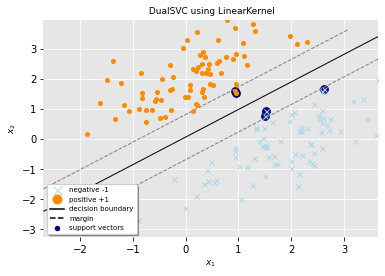

cvxopt svc accuracy score is 1.0
cvxopt svc found 5 support vectors from 150 examples
cvxopt svc w is [-1.22200818  1.33358991]
cvxopt svc b is -0.09476791335433088

CPU times: user 648 µs, sys: 137 µs, total: 785 µs
Wall time: 794 µs


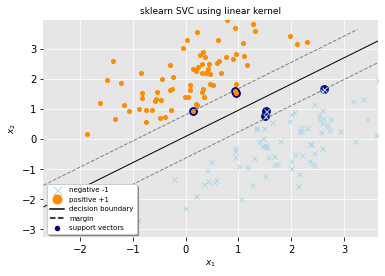

sklearn svc accuracy score is 1.0
sklearn svc found 6 support vectors from 150 examples
sklearn svc w is [[-1.20596101  1.38554565]]
sklearn svc b is [-0.1285028]


In [9]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, optimizer=SMOClassifier, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = DualSVC(kernel=linear, optimizer='cvxopt', verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'cvxopt svc accuracy score is {svc.score(X_test, y_test)}')
print(f'cvxopt svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svc w is {svc.coef_}')
print(f'cvxopt svc b is {svc.intercept_}')

print()

svc = SKLSVC(kernel='linear')
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

In order to relax the constraints in the *Wolfe dual* formulation (1.17) to define the problem as a *Lagrangian dual* relaxation by embedding them into objective function we need to allocate the Lagrangian multipliers $\lambda \geq 0$, $\mu \geq 0$:

$$
\begin{align*}
    \mathcal{L}(\alpha, \lambda, \mu) &= \frac{1}{2} \alpha^{T}Q\alpha-q^T\alpha - \lambda^T \alpha - \mu^T (y^T \alpha) \tag{1.21}
\end{align*}
$$

From (1.13) we can notice that the equality constraint $y^T \alpha = 0$ arises form the stationarity condition $\displaystyle \frac{\partial \mathcal{W}}{\partial b}=0$. So, for simplicity, we can again consider the bias term $b$ embedded into the weight vector. In this way the dimensionality of (1.21) is reduced by exactly 1/3 by removing the multipliers $\mu$ which was allocated to control the equality constraint:

$$
\begin{align*}
    \mathcal{L}(\alpha, \lambda) &= \frac{1}{2} \alpha^{T}Q\alpha-q^T\alpha - \lambda^T \alpha \\
    &= \displaystyle \frac{1}{2} \alpha^{T}Q\alpha + (q - \lambda)^T \alpha \tag{1.22}
\end{align*}
$$

In [10]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import generate_linearly_separable_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-2.1385e-01	ub: -2.1385e-01 - pcost:  2.1385e-01 - gap:  4.2770e-01
   1	   1	 1.4755e+01	ub:  2.1385e-01 - pcost:  2.1385e-01 - gap:  0.0000e+00

CPU times: user 69.9 ms, sys: 85.8 ms, total: 156 ms
Wall time: 57.8 ms


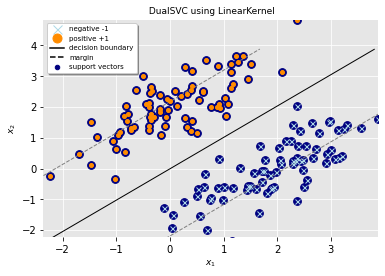

svc accuracy score is 1.0
svc found 150 support vectors from 150 examples
svc w is [-0.46686416  0.45797037]
svc b is 0.003521110341307247


In [11]:
X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, optimizer=AdaGrad, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

#### Nonlinearly Separable Binary Classification

In order to extend the SVM methodology to handle data that is not fully linearly separable, we relax the constraints for (1.1) and (1.2) slightly to allow for misclassified points. This is done by introducing a positive slack variable $\xi_{i}, i=1$, $\dots$, $n$ :

$$
\begin{equation}
    \langle w, x_i \rangle +b\geq+1-\xi_{i} \ \text{for} \ y_{i}=+1 \tag{2.1}
\end{equation}
$$
$$
\begin{equation}
    \langle w, x_i \rangle +b\leq-1+\xi_{i} \ \text{for} \ y_{i}=-1 \tag{2.2}
\end{equation}
$$ 

$$\text{where} \ \xi_{i}\geq 0 \ \forall_{i}$$

Which can be combined into:

$$
\begin{equation}
    y_{i}(\langle w, x_i \rangle +b) \geq 1 - \xi_{i} \ \forall_{i} \text{where} \ \xi_{i}\geq 0 \ \forall_{i} \tag{2.3}
\end{equation}
$$

<img src="./img/svc_soft.png" width=600/>

In this *soft margin* SVM, data points on the incorrect side of the margin boundary have a penalty that increases with the distance from it. As we are trying to reduce the number of misclassifications, a sensible way to adapt our objective function (1.7) from previously, is to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{w,b,\xi} \quad & \frac{1}{2} \Vert w \Vert^2 + C \sum_{i=1}^{n} \xi_{i} \\
            \textrm{subject to} \quad & y_{i}(\langle w, x_i \rangle +b) \geq 1 - \xi_{i} \ \forall_{i} \\ & \xi_{i} \geq 0 \ \forall_{i}
    \end{aligned} \tag{2.4}
\end{equation}
$$

where the parameter $C$ controls the trade-off between the slack variable penalty and the size of the margin. 

Again, this optimization problem can be formulated with the bias term $b$ embedded into the weight vector $w$ as:

$$
\begin{equation}
    \min_{w} \frac{1}{2} \Vert w \Vert^2 + C \sum_{i=1}^n \max(0, y_i \langle w, x_i \rangle) \tag{2.5a}
\end{equation}
$$

where we make use of the *Hinge* (L1) loss.

In [12]:
from optiml.ml.svm import PrimalSVC
from optiml.ml.svm.losses import hinge, squared_hinge
from optiml.ml.utils import generate_linearly_separable_overlap_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad, StochasticGradientDescent
from optiml.opti.utils import plot_trajectory_optimization

from sklearn.svm import LinearSVC as SKLinearSVC
from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	 1.0000e+00 - val_loss:  1.0000e+00 - acc:  0.4667 - val_acc:  0.8667
  50	  50	 1.3144e-01 - val_loss:  1.0367e-01 - acc:  0.9852 - val_acc:  1.0000
 100	 100	 1.0697e-01 - val_loss:  9.3086e-02 - acc:  0.9852 - val_acc:  1.0000
 150	 150	 9.5581e-02 - val_loss:  9.3812e-02 - acc:  0.9852 - val_acc:  1.0000
 200	 200	 8.8896e-02 - val_loss:  9.7169e-02 - acc:  0.9852 - val_acc:  1.0000
 250	 250	 8.4302e-02 - val_loss:  1.0073e-01 - acc:  0.9852 - val_acc:  1.0000
 300	 300	 8.2012e-02 - val_loss:  1.0400e-01 - acc:  0.9852 - val_acc:  1.0000
 350	 350	 8.0493e-02 - val_loss:  1.0747e-01 - acc:  0.9852 - val_acc:  1.0000
 400	 400	 7.9418e-02 - val_loss:  1.1165e-01 - acc:  0.9852 - val_acc:  1.0000
 450	 450	 7.8385e-02 - val_loss:  1.1667e-01 - acc:  0.9852 - val_acc:  1.0000
 500	 500	 7.7385e-02 - val_loss:  1.2173e-01 - acc:  0.9852 - val_acc:  1.0000
 550	 550	 7.6432e-02 - val_loss:  1.2682e-01 - acc:  0.9852 - val_acc:  1.0000
 600	 600	 7.5815e-02 

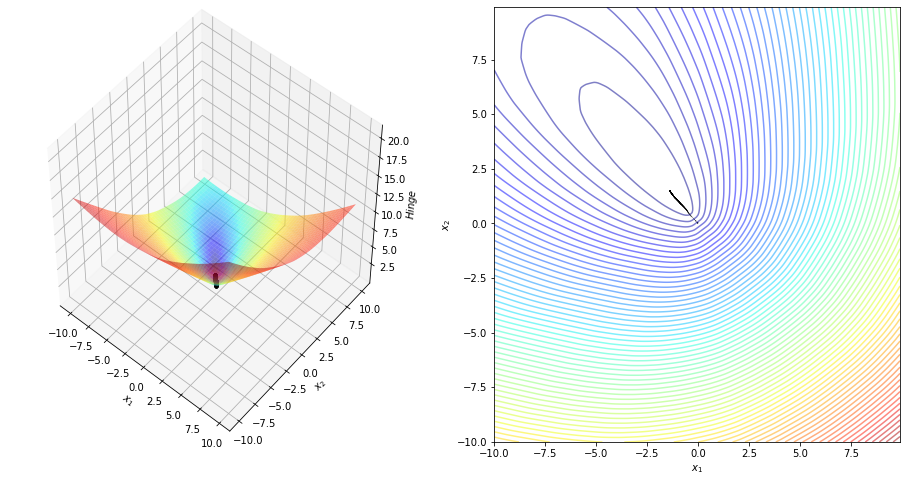

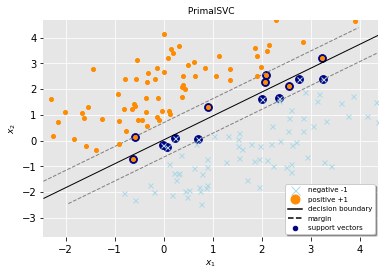

svc accuracy score is 0.98
svc found 15 support vectors from 150 examples
svc w is [-1.38345525  1.49141536]
svc b is -0.032182860583460114

CPU times: user 916 µs, sys: 176 µs, total: 1.09 ms
Wall time: 1.11 ms


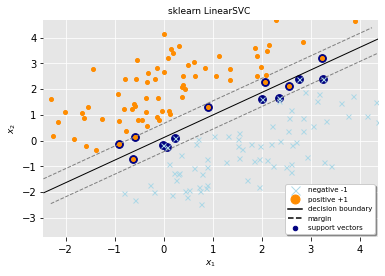

sklearn svc accuracy score is 0.98
sklearn svc found 14 support vectors from 150 examples
sklearn svc w is [[-1.59852869  1.82587647]]
sklearn svc b is [-0.20188466]


In [13]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=hinge, optimizer=AdaGrad, learning_rate=0.1,
                C=1, validation_split=0.1, verbose=50)
%time svc.fit(X_train, y_train)
plot_trajectory_optimization(svc.loss, svc.optimizer, -10, 10, -10, 10)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = SKLinearSVC(loss='hinge', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'sklearn svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

To provide a continuously differentiable function the optimization problem (2.5a) can be formulated as: 

$$
\begin{equation}
    \min_{w} \frac{1}{2} \Vert w \Vert^2 + C \sum_{i=1}^n \max(0, y_i \langle w, x_i \rangle)^2 \tag{2.5b}
\end{equation}
$$

where we make use of the *squared Hinge* (L2) loss.

epoch	iter	 cost	
   0	   0	 1.0000e+00 - val_loss:  1.0000e+00 - acc:  0.5111 - val_acc:  0.4667
  50	  50	 3.8477e-02 - val_loss:  8.5090e-02 - acc:  0.9852 - val_acc:  1.0000
 100	 100	 3.5343e-02 - val_loss:  1.1021e-01 - acc:  0.9926 - val_acc:  1.0000
 150	 150	 3.4821e-02 - val_loss:  1.3448e-01 - acc:  0.9926 - val_acc:  1.0000
 200	 200	 3.5740e-02 - val_loss:  1.5812e-01 - acc:  1.0000 - val_acc:  1.0000
 250	 250	 3.6291e-02 - val_loss:  1.6465e-01 - acc:  1.0000 - val_acc:  1.0000
 300	 300	 3.6520e-02 - val_loss:  1.6609e-01 - acc:  1.0000 - val_acc:  1.0000
 350	 350	 3.6276e-02 - val_loss:  1.6671e-01 - acc:  1.0000 - val_acc:  1.0000
 400	 400	 3.6431e-02 - val_loss:  1.6673e-01 - acc:  1.0000 - val_acc:  1.0000
 450	 450	 3.6252e-02 - val_loss:  1.6645e-01 - acc:  1.0000 - val_acc:  1.0000
 500	 500	 3.6427e-02 - val_loss:  1.6676e-01 - acc:  1.0000 - val_acc:  1.0000
 550	 550	 3.6343e-02 - val_loss:  1.6668e-01 - acc:  1.0000 - val_acc:  1.0000
 600	 600	 3.6408e-02 

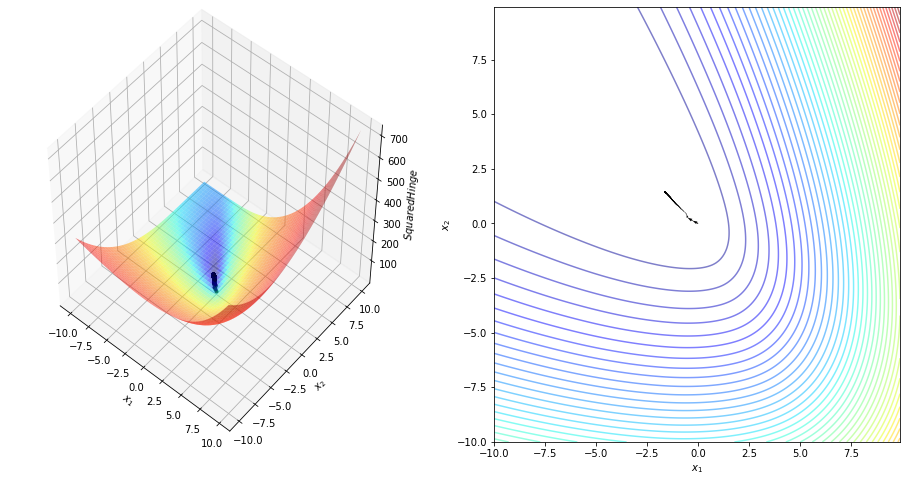

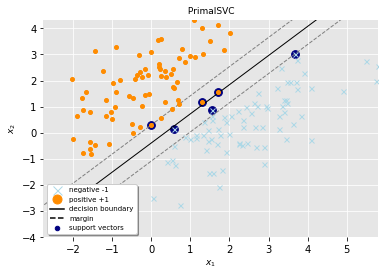

svc accuracy score is 1.0
svc found 6 support vectors from 150 examples
svc w is [-1.61320367  1.44366284]
svc b is 0.5650733077647249

CPU times: user 803 µs, sys: 133 µs, total: 936 µs
Wall time: 946 µs


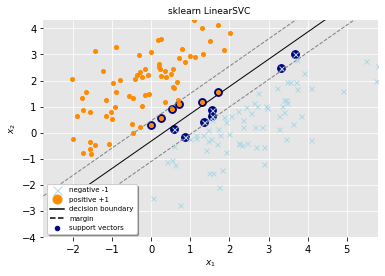

sklearn svc accuracy score is 1.0
sklearn svc found 13 support vectors from 150 examples
sklearn svc w is [[-1.33903544  1.28173535]]
sklearn svc b is [0.40750592]


In [15]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=squared_hinge, optimizer=StochasticGradientDescent,
                C=1, learning_rate=0.1, validation_split=0.1, verbose=50)
%time svc.fit(X_train, y_train)
plot_trajectory_optimization(svc.loss, svc.optimizer, -10, 10, -10, 10)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = SKLinearSVC(loss='squared_hinge', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(svc.decision_function(X_train)) <= 1).ravel()
print(f'sklearn svc found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

Reformulating as a Lagrangian, which as before we need to minimize with respect to $w$, $b$ and $\xi_{i}$ and maximize with respect to $\alpha$ (where $\alpha_{i} \geq 0, \mu_{i} \geq 0 \ \forall_{i}$):

$$
\begin{equation}
    \mathcal{W}(w,b,\xi,\alpha) \displaystyle = \frac{1}{2}\Vert w\Vert^{2}+C\sum_{i=1}^n\xi_{i}-\sum_{i=1}^n\alpha_{i}[y_{i}(\langle w, {x}_{i} \rangle+b)-1+\xi_{i}]-\sum_{i=1}^n\mu_{i}\xi_{i} \tag{2.6}
\end{equation}
$$

Differentiating with respect to $w$, $b$ and $\xi_{i}$ and setting the derivatives to zero:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}\alpha_{i}y_{i}x_i \tag{2.7}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial b}=0\Rightarrow\sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{2.8}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial\xi_{i}}=0\Rightarrow C=\alpha_{i}+\mu_{i} \tag{2.9}
\end{equation}
$$

Substituting these in, $\mathcal{W}(\alpha)$ has the same form as (1.16) before. However (2.9) together with $\mu_{i}\geq 0 \ \forall_{i}$, implies that $\alpha\leq C$. We therefore need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2}\alpha^{T}Q\alpha-q^T\alpha \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}\leq C \ \forall_{i} \\ & y^T\alpha=0 
    \end{aligned} \tag{2.10}
\end{equation}
$$

where $q$ is a vector of all ones.

The bias term $b$ is then calculated in the same way as in (1.7) before, though in this instance the set of support vectors used to calculate $b$ is determined by finding the indices $i$ where $0\leq\alpha_{i}\leq C$.

Again, since the SMO method is designed to deal the equality constraint explicitly we will make use of the formulation (2.10) but, for completeness reasons, we report below the bounded dual formulation that arises from the primal (2.5a) where the bias term $b$ is embedded into the weight vector $w$:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2} \alpha^{T}(Q + yy^T)\alpha-q^T\alpha \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}\leq C \ \forall_{i}
    \end{aligned} \tag{2.11}
\end{equation}
$$

where $q$ is a vector of all ones.

In [16]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.smo import SMOClassifier
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import generate_linearly_separable_overlap_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

iter	 cost
   0	-4.2513e+00
   1	-8.7476e+00
   2	-9.5157e+00
   3	-9.6018e+00
   4	-9.6465e+00
   5	-1.0066e+01
   6	-1.0113e+01
   7	-1.0141e+01
   8	-1.0146e+01
   9	-1.0146e+01
  10	-1.0146e+01

CPU times: user 138 ms, sys: 133 ms, total: 271 ms
Wall time: 76.4 ms


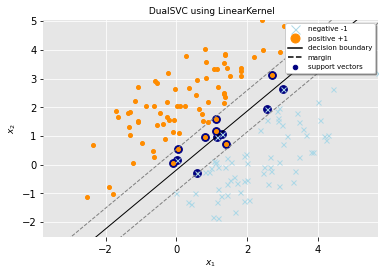

svc accuracy score is 0.98
svc found 14 support vectors from 150 examples
svc w is [-1.41490835  1.38059041]
svc b is 0.26105114865923085

     pcost       dcost       gap    pres   dres
 0: -2.9246e+01 -2.6833e+02  1e+03  2e+00  9e-15
 1: -1.8268e+01 -1.3922e+02  2e+02  3e-01  5e-15
 2: -9.4677e+00 -2.8635e+01  3e+01  3e-02  7e-15
 3: -9.6005e+00 -1.3845e+01  6e+00  6e-03  4e-15
 4: -1.0092e+01 -1.2071e+01  2e+00  2e-03  4e-15
 5: -1.0358e+01 -1.1120e+01  9e-01  4e-04  3e-15
 6: -1.0559e+01 -1.0778e+01  2e-01  1e-16  4e-15
 7: -1.0659e+01 -1.0662e+01  3e-03  2e-16  3e-15
 8: -1.0660e+01 -1.0660e+01  3e-05  2e-16  4e-15
 9: -1.0660e+01 -1.0660e+01  3e-07  2e-16  4e-15
Optimal solution found.

CPU times: user 146 ms, sys: 170 ms, total: 317 ms
Wall time: 79.7 ms


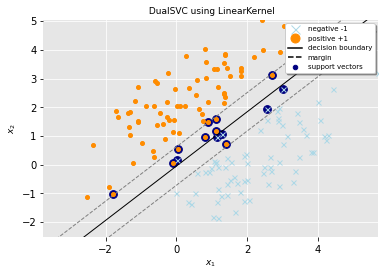

cvxopt svc accuracy score is 0.96
cvxopt svc found 14 support vectors from 150 examples
cvxopt svc w is [-1.4131181   1.49547655]
cvxopt svc b is 0.07839036431256571

CPU times: user 971 µs, sys: 170 µs, total: 1.14 ms
Wall time: 1.16 ms


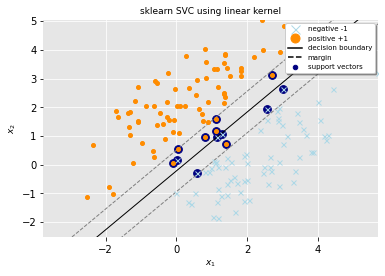

sklearn svc accuracy score is 0.98
sklearn svc found 14 support vectors from 150 examples
sklearn svc w is [[-1.41490837  1.38059038]]
sklearn svc b is [0.30443893]


In [17]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, C=1, optimizer=SMOClassifier, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

print()

svc = DualSVC(kernel=linear, C=1, optimizer='cvxopt', verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'cvxopt svc accuracy score is {svc.score(X_test, y_test)}')
print(f'cvxopt svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svc w is {svc.coef_}')
print(f'cvxopt svc b is {svc.intercept_}')

print()

svc = SKLSVC(kernel='linear', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')

In order to relax the box-constraints in the *Wolfe dual* formulation (2.10) to define the problem as a *Lagrangian dual* relaxation by embedding them into objective function we need to allocate the Lagrangian multipliers $\lambda$:

$$
\begin{align*}
    \mathcal{L}(\alpha, \lambda_+, \lambda_-) &= \frac{1}{2} \alpha^{T}Q\alpha-q^T\alpha - \lambda_+^T (ub - \alpha) - \lambda_-^T \alpha \\
    &= \displaystyle \frac{1}{2} \alpha^{T}Q\alpha + (q + \lambda_+ - \lambda_-)^T \alpha - \lambda_+^T ub \tag{2.12}
\end{align*}
$$

where $\lambda_+$ and $\lambda_-$ are the first and last $m$ components of $\lambda$ respectively, both constrained to be $\geq 0$, and $ub$, the upper bound, is a vector of all $C$ values.

In [18]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import generate_linearly_separable_overlap_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-1.6311e-01	ub: -1.6311e-01 - pcost:  1.6311e-01 - gap:  3.2622e-01
   1	   1	 1.4812e+01	ub:  1.6311e-01 - pcost:  1.6311e-01 - gap:  0.0000e+00

CPU times: user 50.8 ms, sys: 62.9 ms, total: 114 ms
Wall time: 28.8 ms


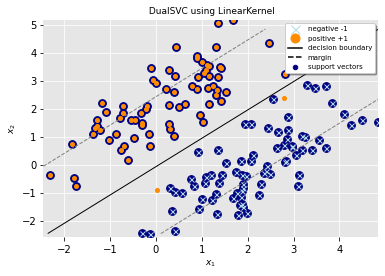

svc accuracy score is 1.0
svc found 148 support vectors from 150 examples
svc w is [-0.40568101  0.40086232]
svc b is 0.025752121937356924


In [19]:
X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=linear, C=1, optimizer=AdaGrad, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc w is {svc.coef_}')
print(f'svc b is {svc.intercept_}')

### Support Vector Regression

Instead of attempting to classify new unseen variables $x'$ into one of two categories $y'=\pm 1$, we now wish to predict a real-valued output for $y'$ so that our training data is of the form:

$$
\{x_i,y_i\} \text{where i}=1, \dots, n, x\in\Re^{m}, y_{i}\in\Re
$$

The regression SVM will use a more sophisticated penalty function than before, not allocating a penalty if the predicted value $y'_{i}$ is less than a distance $\epsilon$ away from the actual value $y_{i}$, i.e., if $|y_{i}-y'_{i}|<\epsilon$. 

<img src="./img/svr.png" width=600/>

Referring to this figure, the region bound by $y'_{i}\pm\epsilon \ \forall_{i}$ is called an $\epsilon$-insensitive tube. The other modification to the penalty function is that output variables which are outside the tube are given one of two slack variable penalties depending on whether they lie above $(\xi^{+})$ or below $(\xi^{-})$ the tube (where $\xi^{+} \geq 0, \xi^{-} \geq 0 \ \forall_{i}$):

$$
\begin{equation}
    y_{i}\leq y'_{i}+\epsilon+\xi^{+} \tag{3.1}
\end{equation}
$$
$$
\begin{equation}
    y_{i}\geq y'_{i}-\epsilon-\xi^{-} \tag{3.2}
\end{equation}
$$

The error function for SVM regression can then be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_{w,b,\xi^{+},\xi^{-}} \quad & \frac{1}{2}\Vert w\Vert^{2} + C \sum_{i=1}^{n}(\xi_{i}^{+}+\xi_{i}^{-}) \\
            \textrm{subject to} \quad & y_{i} - \langle w, x_i \rangle - b \leq \epsilon + \xi_{i}^{+} \ \forall_{i} \\ & \langle w, x_i \rangle + b - y_{i} \leq \epsilon + \xi_{i}^{-} \ \forall_{i} \\ & \xi_{i}^{+}, \xi_{i}^{-} \geq 0 \ \forall_{i}
    \end{aligned} \tag{3.3}
\end{equation}
$$

This optimization problem can be formulated with the bias term $b$ embedded into the weight vector $w$ as:

$$
\begin{equation}
    \min_ {w} \frac{1}{2} \Vert w\Vert^{2} + C \sum_{i=1}^n \max(0, |y_i - \langle w, x_i \rangle| - \epsilon) \tag{3.4a}
\end{equation}
$$

where we make use of the *epsilon-insensitive* (L1) loss, i.e., errors of less than $\epsilon$ are ignored.

In [20]:
from optiml.ml.svm import PrimalSVR
from optiml.ml.svm.losses import epsilon_insensitive, squared_epsilon_insensitive
from optiml.ml.utils import plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad, StochasticGradientDescent
from optiml.opti.utils import plot_trajectory_optimization

from sklearn.svm import LinearSVR as SKLinearSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	 4.9957e+01 - val_loss:  5.9778e+01 - r2: -0.0009
  50	  50	 3.8695e+01 - val_loss:  5.9596e+01 - r2:  0.4593
 100	 100	 3.4591e+01 - val_loss:  7.1354e+01 - r2:  0.6341
 150	 150	 3.2364e+01 - val_loss:  8.3801e+01 - r2:  0.7330
 200	 200	 3.0946e+01 - val_loss:  9.5878e+01 - r2:  0.7984
 250	 250	 2.9985e+01 - val_loss:  1.0728e+02 - r2:  0.8448
 300	 300	 2.9311e+01 - val_loss:  1.1791e+02 - r2:  0.8788
 350	 350	 2.8836e+01 - val_loss:  1.2775e+02 - r2:  0.9043
 400	 400	 2.8511e+01 - val_loss:  1.3679e+02 - r2:  0.9238
 450	 450	 2.8281e+01 - val_loss:  1.4509e+02 - r2:  0.9389
 500	 500	 2.8120e+01 - val_loss:  1.5266e+02 - r2:  0.9506
 550	 550	 2.8016e+01 - val_loss:  1.5956e+02 - r2:  0.9597
 600	 600	 2.7953e+01 - val_loss:  1.6583e+02 - r2:  0.9669
 650	 650	 2.7917e+01 - val_loss:  1.7151e+02 - r2:  0.9727
 700	 700	 2.7906e+01 - val_loss:  1.7677e+02 - r2:  0.9772
 750	 750	 2.7914e+01 - val_loss:  1.8155e+02 - r2:  0.9808
 800	 800	 2.7931e+01 

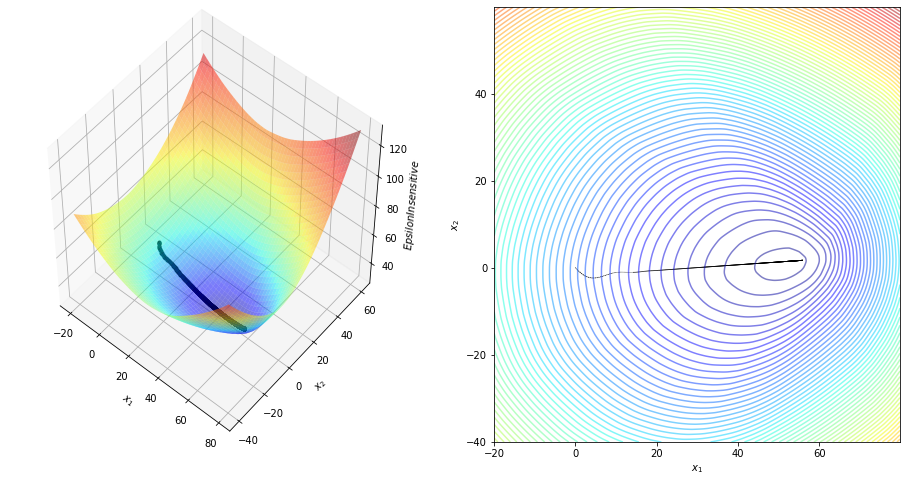

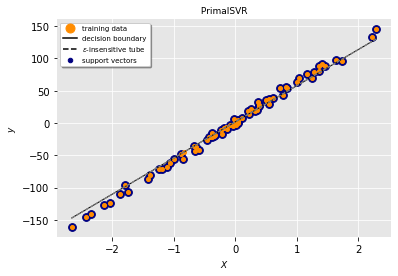

svr r2 score is 0.9922295848045528
svr found 96 support vectors from 75 examples
svr w is [55.92669116]
svr b is 1.734932493523009

CPU times: user 1.48 ms, sys: 0 ns, total: 1.48 ms
Wall time: 1.3 ms


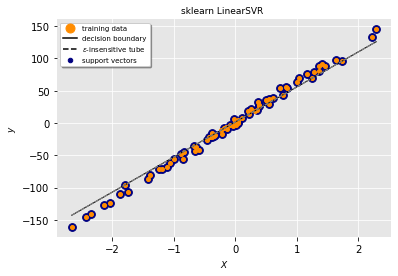

sklearn svr r2 score is 0.9876320530497613
sklearn svr found 96 support vectors from 75 examples
sklearn svr w is [54.23027977]
sklearn svr b is [1.50035217]


In [21]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = PrimalSVR(loss=epsilon_insensitive, epsilon=0.1, optimizer=AdaGrad,
                C=1, learning_rate=0.15, momentum_type='nesterov', 
                validation_split=0.1, verbose=50)
%time svr.fit(X_train, y_train)
plot_trajectory_optimization(svr.loss, svr.optimizer, -20, 80, -40, 60)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(y - svr.predict(X)) >= svr.epsilon).ravel()
print(f'svr found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

print()

svr = SKLinearSVR(loss='epsilon_insensitive', epsilon=0.1, C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(y - svr.predict(X)) >= svr.epsilon).ravel()
print(f'sklearn svr found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr w is {svr.coef_}')
print(f'sklearn svr b is {svr.intercept_}')

To provide a continuously differentiable function the optimization problem (3.4a) can be formulated as: 

$$
\begin{equation}
    \min_ {w} \frac{1}{2} \Vert w\Vert^{2} + C \sum_{i=1}^n \max(0, |y_i - \langle w, x_i \rangle| - \epsilon)^2 \tag{3.4b}
\end{equation}
$$

where we make use of the *squared epsilon-insensitive* (L2) loss.

epoch	iter	 cost	
   0	   0	 3.5213e+03 - val_loss:  4.0556e+03 - r2: -0.0019
  50	  50	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 100	 100	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 150	 150	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 200	 200	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 250	 250	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 300	 300	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 350	 350	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 400	 400	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 450	 450	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 500	 500	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 550	 550	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 600	 600	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 650	 650	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 700	 700	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 750	 750	 4.0820e+01 - val_loss:  2.3221e+02 - r2:  0.9959
 800	 800	 4.0820e+01 

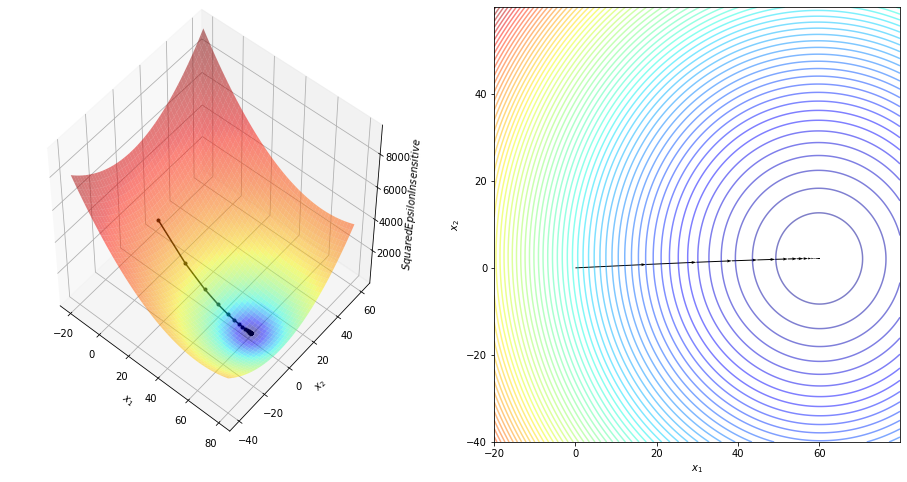

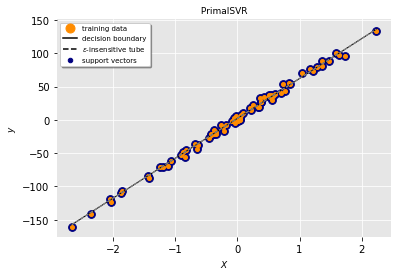

svr r2 score is 0.9968428502098798
svr found 100 support vectors from 75 examples
svr w is [60.01511793]
svr b is 2.166981660341384

CPU times: user 1.64 ms, sys: 88 µs, total: 1.73 ms
Wall time: 1.31 ms


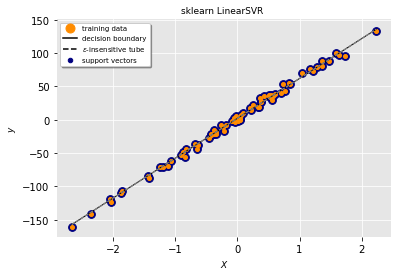

sklearn svr r2 score is 0.9968359558407728
sklearn svr found 100 support vectors from 75 examples
sklearn svr w is [59.92853024]
sklearn svr b is [2.12128284]


In [22]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = PrimalSVR(loss=squared_epsilon_insensitive, epsilon=0.1, C=1, 
                optimizer=StochasticGradientDescent, learning_rate=0.15, 
                validation_split=0.1, verbose=50)
%time svr.fit(X_train, y_train)
plot_trajectory_optimization(svr.loss, svr.optimizer, -20, 80, -40, 60)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(y - svr.predict(X)) >= svr.epsilon).ravel()
print(f'svr found {len(support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

print()

svr = SKLinearSVR(loss='squared_epsilon_insensitive', epsilon=0.1, C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
support_ = np.argwhere(np.abs(y - svr.predict(X)) >= svr.epsilon).ravel()
print(f'sklearn svr found {len(support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr w is {svr.coef_}')
print(f'sklearn svr b is {svr.intercept_}')

This needs to be minimized subject to the constraints $\xi^{+}\geq 0, \xi^{-}\geq 0 \ \forall_{i}$ and (3.1) and (3.2). In order to do this we introduce Lagrange multipliers $\alpha_{i}^{+}\geq 0, \alpha_{i}^{-}\geq 0, \mu_{i}^{+}\geq 0\mu_{i}^{-}\geq 0 \ \forall_{i}$:

$$
\begin{equation}
    \mathcal{W}(w,b,\xi^{+},\xi^{-}) \displaystyle = \frac{1}{2}\Vert w\Vert^{2}+C \sum_{i=1}^n(\xi_{i}^{+}+\xi_{i}^{-})-\sum_{i=1}^n(\mu_{i}^{+}\xi_{i}^{+}+\mu_{i}^{-}\xi_{i}^{-})-\sum_{i=1}^n\alpha_{i}^{+}(\epsilon+\xi_{i}^{+}+y'_{i}-y_{i})-\sum_{i=1}^n\alpha_{i}^{-}(\epsilon+\xi_{i}^{-}-y'_{i}+y_{i}) \tag{3.5}
\end{equation}
$$

Substituting for $y_{i}$, differentiating with respect to $w, b, \xi^{+}$ and $\xi^{-}$ and setting the derivatives to $0$:

$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})x_{i} \tag{3.6}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial b}=0\Rightarrow \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})=0 \tag{3.7}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial\xi_{i}^{+}}=0\Rightarrow C=\alpha_{i}^{+}+\mu_{i}^{+} \tag{3.8}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial \mathcal{W}}{\partial\xi_{i}^{-}}=0\Rightarrow C=\alpha_{i}^{-}+\mu_{i}^{-} \tag{3.9}
\end{equation}
$$

Substituting (3.6) and (3.7) in, we now need to maximize $L_{D}$ with respect to $\alpha_{i}^{+}$ and $\alpha_{i}^{-}(\alpha_{i}^{+}\geq 0,\ \alpha_{i}^{-}\geq 0 \ \forall_{i})$ where:

$$
\begin{equation}
    \mathcal{W}(\alpha^{+},\alpha^{-}) = \displaystyle \sum_{i=1}^{n}y_{i}(\alpha_{i}^{+}-\alpha_{i}^{-})-\epsilon\sum_{i=1}^{n}(\alpha_{i}^{+}+\alpha_{i}^{-})-\frac{1}{2}\sum_{i,j}(\alpha_{i}^{+}-\alpha_{i}^{-})\langle x_i, x_j \rangle(\alpha_{j}^{+}-\alpha_{j}^{-}) \tag{3.10}
\end{equation}
$$

Using $\mu_{i}^{+}\geq 0$ and $\mu_{i}^{-}\geq 0$ together with (3.8) and (3.9) means that $\alpha_{i}^{+}\leq C$ and $\alpha_{i}^{-}\leq C$. We therefore need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha^+,\alpha^-} \quad & \frac{1}{2}(\alpha^{+}-\alpha^{-})^TQ(\alpha^{+}-\alpha^{-})+\epsilon q^T(\alpha^{+}+\alpha^{-})-y^T(\alpha^{+}-\alpha^{-}) \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}^{+},\alpha_{i}^{-}\leq C \ \forall_{i} \\ & q^T(\alpha^{+}-\alpha^{-})=0
    \end{aligned} \tag{3.11}
\end{equation}
$$

where $q$ is a vector of all ones.

We can write the (3.11) in a standard quadratic form as:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2}\alpha^{T}Q\alpha-q^T\alpha \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}\leq C \ \forall_{i} \\ & e^T\alpha=0 
    \end{aligned} \tag{3.12}
\end{equation}
$$

where the gram matrix $Q$ is 
$
\begin{bmatrix}
K & -K\\
-K & K 
\end{bmatrix}$
, $q$ is 
$
\begin{bmatrix}
y\\
-y
\end{bmatrix}$ + $\epsilon$
, and $e$ is 
$
\begin{bmatrix}
1\\
-1
\end{bmatrix}$.

Each new predictions $y'$ can be found using:

$$
\begin{equation}
    y'=\displaystyle \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})\langle x_{i}, x' \rangle+b \tag{3.13}
\end{equation}
$$

A set $S$ of support vectors $x_{s}$ can be created by finding the indices $i$ where $0\leq\alpha\leq C$ and $\xi_{i}^{+}=0$ (or $\xi_{i}^{-}=0$).

This gives us:

$$
\begin{equation}
    b=y_{s}-\displaystyle \epsilon-\sum_{m\in S}(\alpha_m^+ -\alpha_m^-) \langle x_{m}, x_{s} \rangle \tag{3.14}
\end{equation}
$$

As before it is better to average over all the indices $i$ in $S$:

$$
\begin{equation}
    b=\displaystyle \frac{1}{N_{s}}\sum_{s\in S}y_{s}-\epsilon-\sum_{m\in S}(\alpha_{m}^{+}-\alpha_{m}^{-})\langle x_{m}, x_{s} \rangle \tag{3.15}
\end{equation}
$$

In [23]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.smo import SMORegression
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import plot_svm_hyperplane

from sklearn.svm import SVR as SKLSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

iter	 cost
   0	-1.8491e+03
   1	-1.8491e+03
   2	-1.8875e+03
   3	-1.8908e+03
   4	-1.8908e+03
   5	-1.8915e+03
   6	-1.8917e+03
   7	-1.8919e+03
   8	-1.8919e+03
   9	-1.8919e+03

CPU times: user 68.4 ms, sys: 59.7 ms, total: 128 ms
Wall time: 37.7 ms


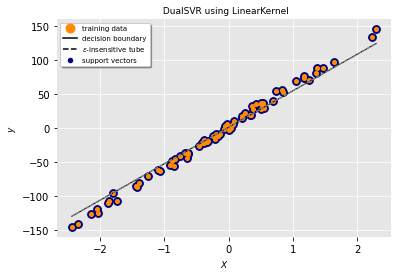

svr r2 score is 0.98338004874927
svr found 75 support vectors from 75 examples
svr w is [53.63769312]
svr b is 1.2535357504572957

     pcost       dcost       gap    pres   dres
 0: -2.8102e+03 -2.6365e+03  9e+03  7e+00  2e-16
 1: -2.0370e+03 -2.4739e+03  1e+03  9e-01  3e-16
 2: -1.9296e+03 -2.1787e+03  5e+02  3e-01  2e-16
 3: -1.8923e+03 -2.0108e+03  2e+02  1e-01  2e-16
 4: -1.8852e+03 -1.9044e+03  3e+01  1e-02  2e-16
 5: -1.8912e+03 -1.8940e+03  3e+00  1e-03  1e-16
 6: -1.8922e+03 -1.8925e+03  3e-01  8e-05  2e-16
 7: -1.8923e+03 -1.8923e+03  5e-02  1e-05  1e-16
 8: -1.8923e+03 -1.8923e+03  3e-03  6e-07  2e-16
 9: -1.8923e+03 -1.8923e+03  3e-05  6e-09  2e-16
Optimal solution found.

CPU times: user 124 ms, sys: 151 ms, total: 275 ms
Wall time: 91 ms


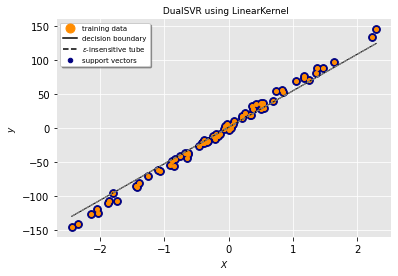

cvxopt svr r2 score is 0.9833639143175251
cvxopt svr found 75 support vectors from 75 examples
cvxopt svr w is [53.63457911]
cvxopt svr b is 1.2414118403321694

CPU times: user 1.69 ms, sys: 97 µs, total: 1.79 ms
Wall time: 1.23 ms


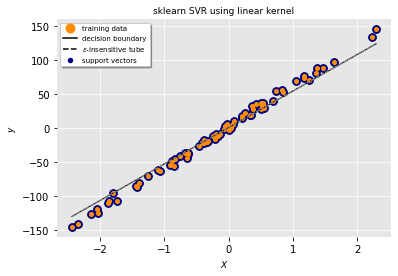

sklearn svr r2 score is 0.9831967715896704
sklearn svr found 75 support vectors from 75 examples
sklearn svr w is [[53.63769329]]
sklearn svr b is [0.86816405]


In [24]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=linear, epsilon=0.1, C=1, optimizer=SMORegression, verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

print()

svr = DualSVR(kernel=linear, epsilon=0.1, C=1, optimizer='cvxopt', verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'cvxopt svr r2 score is {svr.score(X_test, y_test)}')
print(f'cvxopt svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svr w is {svr.coef_}')
print(f'cvxopt svr b is {svr.intercept_}')

print()

svr = SKLSVR(kernel='linear', epsilon=0.1, C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr w is {svr.coef_}')
print(f'sklearn svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.12) is:

In [25]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import linear
from optiml.ml.utils import plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-1.8122e+03	ub: -1.8122e+03 - pcost:  1.8122e+03 - gap:  2.0000e+00
   1	   1	-1.7928e+03	ub:  1.8122e+03 - pcost:  1.8122e+03 - gap:  0.0000e+00

CPU times: user 21 ms, sys: 43.5 ms, total: 64.5 ms
Wall time: 16.1 ms


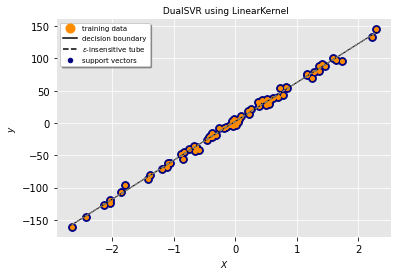

svr r2 score is 0.9972486801710954
svr found 75 support vectors from 75 examples
svr w is [60.15498287]
svr b is 2.419918297653713


In [26]:
X, y = make_regression(n_samples=100, n_features=1, noise=4., bias=2., random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=linear, epsilon=0.1, C=1, optimizer=AdaGrad, verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr w is {svr.coef_}')
print(f'svr b is {svr.intercept_}')

### Nonlinear Support Vector Machines

When applying our SVM to linearly separable data we have started by creating a matrix $Q$ from the dot product of our input variables:

$$ Q_{ij}=y_{i}y_{j}k(x_{i},\ x_{j})= \langle x_{i}, x_{j} \rangle=x_{i}^{T}x_{j} $$

$k(x_{i},x_{j})$ is an example of a family of functions called *kernel functions* where $k(x_{i},x_{j})=\langle x_{i}, x_{j} \rangle$ being known as a *linear* kernel. The set of kernel functions is composed of variants of (3.1) in that they are all based on calculating inner products of two vectors. This means that if the functions can be recast into a higher dimensionality space by some potentially nonlinear feature mapping function $x\rightarrow \phi(x)$, only inner products of the mapped inputs in the feature space need be determined without us needing to explicitly calculate $\phi$.

The reason that this *kernel trick* is useful is that there are many classification/regression problems that are not linearly separable/regressable in the space of the inputs $x$, which might be in a higher dimensionality feature space given a suitable mapping $x \rightarrow \phi(x)$.

#### Polynomial Kernel

The *polynomial* kernel is defined as:

$$k(x_{i},x_{j})=(\gamma \langle x_i, x_j\rangle + r)^d$$

where $\gamma$ define how far the influence of a single training example reaches (low values meaning ‘far’ and high values meaning ‘close’) and is specified by keyword *gamma*, $d$ by *degree* and $r$ by *coef0*.

##### Support Vector Classifier

In [27]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.smo import SMOClassifier
from optiml.ml.svm.kernels import PolyKernel
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

iter	 cost
   0	-3.3896e-02
   5	-5.4348e-02
  10	-5.6589e-02
  15	-5.7785e-02
  20	-5.7811e-02
  25	-5.7812e-02
  30	-5.7818e-02

CPU times: user 703 ms, sys: 585 ms, total: 1.29 s
Wall time: 459 ms


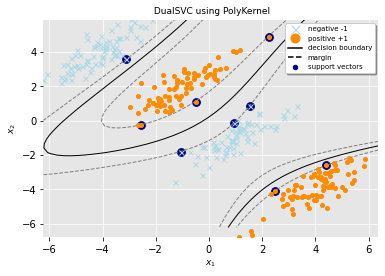

svc accuracy score is 1.0
svc found 9 support vectors from 300 examples
svc b is -0.1516004931960155

     pcost       dcost       gap    pres   dres
 0: -7.5525e+01 -9.0415e+02  6e+03  4e+00  1e-11
 1: -4.0874e+01 -6.0969e+02  1e+03  6e-01  1e-11
 2: -1.5208e+01 -2.0523e+02  4e+02  2e-01  6e-12
 3: -5.1592e+00 -6.1717e+01  1e+02  4e-02  3e-12
 4: -2.4518e+00 -3.0859e+01  5e+01  2e-02  2e-12
 5:  1.5557e-02 -9.6639e+00  1e+01  4e-03  9e-13
 6:  1.1893e-01 -2.2541e+00  3e+00  6e-04  1e-13
 7:  1.9811e-02 -2.1601e-01  2e-01  9e-06  6e-15
 8: -7.7721e-03 -1.2977e-01  1e-01  4e-06  4e-15
 9: -1.8443e-02 -1.3232e-01  1e-01  3e-06  3e-15
10: -3.3329e-02 -9.6133e-02  6e-02  1e-06  2e-15
11: -4.5865e-02 -8.1119e-02  4e-02  2e-07  3e-15
12: -5.3736e-02 -6.5400e-02  1e-02  5e-08  3e-15
13: -5.6890e-02 -5.9813e-02  3e-03  2e-09  3e-15
14: -5.8018e-02 -5.8336e-02  3e-04  1e-10  4e-15
15: -5.8149e-02 -5.8176e-02  3e-05  1e-11  4e-15
16: -5.8161e-02 -5.8162e-02  3e-07  1e-13  4e-15
17: -5.8162e-02 -

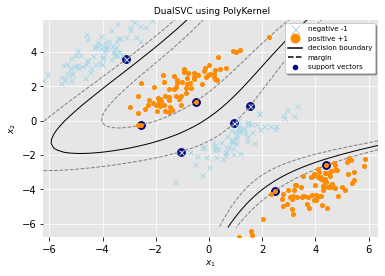

cvxopt svc accuracy score is 1.0
cvxopt svc found 8 support vectors from 300 examples
cvxopt svc b is 2.5189332368558137e-06

CPU times: user 1.7 ms, sys: 113 µs, total: 1.81 ms
Wall time: 1.82 ms


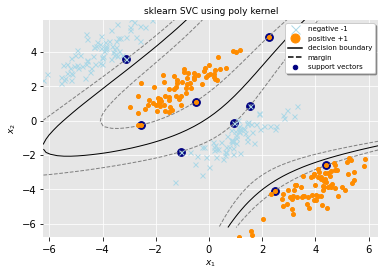

sklearn svc accuracy score is 1.0
sklearn svc found 9 support vectors from 300 examples
sklearn svc b is [-0.13687387]


In [28]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=PolyKernel(degree=3, coef0=3, gamma='auto'), 
              C=1, optimizer=SMOClassifier, verbose=5)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

print()

svc = DualSVC(kernel=PolyKernel(degree=3, coef0=3, gamma='auto'), 
              C=1, optimizer='cvxopt', verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'cvxopt svc accuracy score is {svc.score(X_test, y_test)}')
print(f'cvxopt svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svc b is {svc.intercept_}')

print()

svc = SKLSVC(kernel='poly', degree=3, coef0=3, gamma='auto', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.12) is:

In [29]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import PolyKernel
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-6.1833e-03	ub: -6.1833e-03 - pcost:  6.1833e-03 - gap:  1.2367e-02
   1	   1	 2.9991e+01	ub:  6.1833e-03 - pcost:  6.1833e-03 - gap:  0.0000e+00

CPU times: user 71.6 ms, sys: 95.4 ms, total: 167 ms
Wall time: 50.8 ms


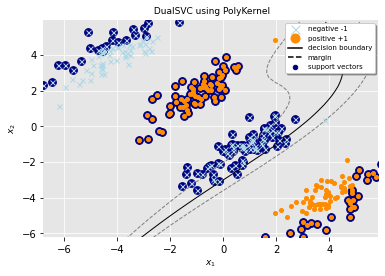

svc accuracy score is 0.7
svc found 194 support vectors from 300 examples
svc b is -1.4031584054814676


In [31]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=PolyKernel(degree=3, coef0=3, gamma='auto'), 
              C=1, optimizer=AdaGrad, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

##### Support Vector Regression

In [2]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.smo import SMORegression
from optiml.ml.svm.kernels import PolyKernel
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from sklearn.svm import SVR as SKLSVR
from sklearn.model_selection import train_test_split

CPU times: user 28min 51s, sys: 179 ms, total: 28min 51s
Wall time: 28min 51s


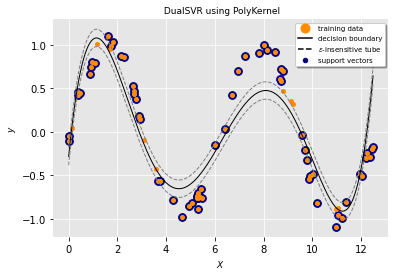

svr r2 score is 0.8866781000272429
svr found 65 support vectors from 75 examples
svr b is -0.2984941354199902

     pcost       dcost       gap    pres   dres
 0: -2.6829e+00 -1.9707e+02  2e+02  3e-17  4e-10
 1: -5.4548e+00 -2.5355e+01  2e+01  1e-16  4e-10
 2: -1.1473e+01 -1.6126e+01  5e+00  2e-16  4e-10
 3: -1.2899e+01 -1.4323e+01  1e+00  2e-16  4e-10
 4: -1.3431e+01 -1.3735e+01  3e-01  2e-16  3e-10
 5: -1.3518e+01 -1.3623e+01  1e-01  2e-16  3e-10
 6: -1.3560e+01 -1.3574e+01  1e-02  2e-16  4e-10
 7: -1.3566e+01 -1.3567e+01  7e-04  1e-16  4e-10
 8: -1.3567e+01 -1.3567e+01  7e-06  2e-16  4e-10
Optimal solution found.

CPU times: user 68.9 ms, sys: 52 ms, total: 121 ms
Wall time: 19.2 ms


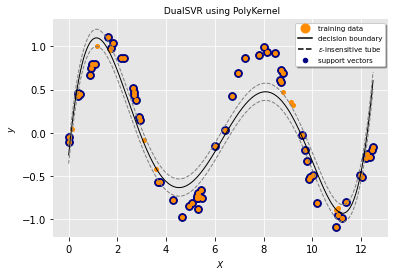

cvxopt svr r2 score is 0.8831486000403188
cvxopt svr found 65 support vectors from 75 examples
cvxopt svr b is 0.025836426934174643

CPU times: user 1.02 s, sys: 0 ns, total: 1.02 s
Wall time: 1.02 s


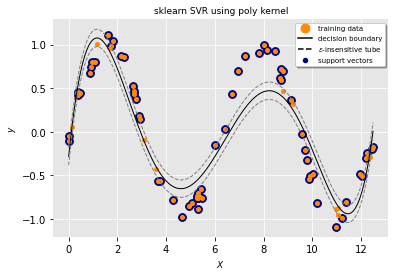

sklearn svr r2 score is 0.8817037899796948
sklearn svr found 64 support vectors from 75 examples
sklearn svr b is [-0.29943022]


In [7]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=PolyKernel(degree=5, coef0=4, gamma='scale'), 
              epsilon=0.1, C=1, optimizer=SMORegression, verbose=False)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

print()

svr = DualSVR(kernel=PolyKernel(degree=5, coef0=4, gamma='scale'), 
              epsilon=0.1, C=1, optimizer='cvxopt', verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'cvxopt svr r2 score is {svr.score(X_test, y_test)}')
print(f'cvxopt svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svr b is {svr.intercept_}')

print()

svr = SKLSVR(kernel='poly', degree=5, coef0=4, gamma='scale', epsilon=0.1, C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.12) is:

In [35]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import PolyKernel
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-3.0628e+00	ub: -3.0628e+00 - pcost:  3.0628e+00 - gap:  2.0000e+00
   1	   1	 1.2815e+01	ub:  3.0628e+00 - pcost:  3.0628e+00 - gap:  0.0000e+00

CPU times: user 29.9 ms, sys: 24 ms, total: 53.8 ms
Wall time: 9.33 ms


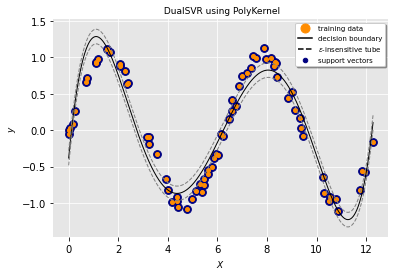

svr r2 score is 0.8698470410983103
svr found 75 support vectors from 75 examples
svr b is -0.0017089193502159898


In [36]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=PolyKernel(degree=5, coef0=4, gamma='scale'), 
              epsilon=0.1, C=1, optimizer=AdaGrad, verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

#### Gaussian RBF Kernel

The *gaussian* kernel is defined as:

$$k(x_{i},x_{j})=\exp(-\frac{\|x_i-x_j\|_2^2}{2\sigma^2})$$

or, equivalently, as:

$$k(x_{i},x_{j})=\exp(-\gamma \|x_i-x_j\|_2^2)$$

where $\displaystyle \gamma=\frac{1}{2\sigma^2}$ define how far the influence of a single training example reaches (low values meaning ‘far’ and high values meaning ‘close’) and is specified by keyword *gamma*.

##### Support Vector Classifier

In [37]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.smo import SMOClassifier
from optiml.ml.svm.kernels import GaussianKernel
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

iter	 cost
   0	-7.9397e+00
   1	-8.9948e+00
   2	-9.2345e+00
   3	-9.2951e+00
   4	-9.3069e+00
   5	-9.3090e+00
   6	-9.3101e+00
   7	-9.3109e+00
   8	-9.3110e+00
   9	-9.3110e+00
  10	-9.9283e+00
  11	-9.9812e+00
  12	-9.9886e+00
  13	-9.9905e+00
  14	-9.9909e+00
  15	-9.9911e+00
  16	-9.9913e+00
  17	-9.9913e+00
  18	-9.9913e+00
  19	-9.9913e+00

CPU times: user 1.74 s, sys: 1.67 s, total: 3.41 s
Wall time: 1.25 s


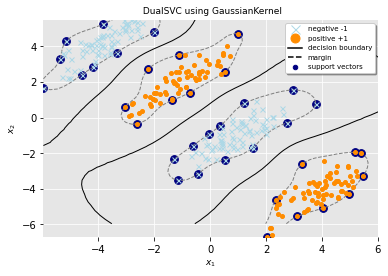

svc accuracy score is 1.0
svc found 38 support vectors from 300 examples
svc b is 0.0023505415660284154

     pcost       dcost       gap    pres   dres
 0: -5.4048e+00 -3.5282e+02  1e+03  1e+00  4e-16
 1:  6.2420e-01 -1.2827e+02  1e+02  3e-16  5e-16
 2: -7.2894e+00 -2.2038e+01  1e+01  2e-16  6e-16
 3: -8.6407e+00 -1.3753e+01  5e+00  2e-16  3e-16
 4: -9.4371e+00 -1.1340e+01  2e+00  2e-16  2e-16
 5: -9.8244e+00 -1.0317e+01  5e-01  2e-16  2e-16
 6: -9.9574e+00 -1.0044e+01  9e-02  2e-16  2e-16
 7: -9.9905e+00 -9.9925e+00  2e-03  2e-16  3e-16
 8: -9.9914e+00 -9.9914e+00  4e-05  2e-16  3e-16
 9: -9.9914e+00 -9.9914e+00  1e-06  2e-16  2e-16
Optimal solution found.

CPU times: user 254 ms, sys: 316 ms, total: 570 ms
Wall time: 149 ms


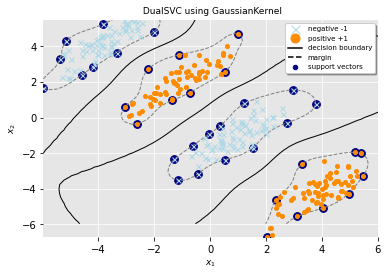

cvxopt svc accuracy score is 1.0
cvxopt svc found 38 support vectors from 300 examples
cvxopt svc b is 8.856233047003694e-05

CPU times: user 2.91 ms, sys: 7 µs, total: 2.92 ms
Wall time: 2.67 ms


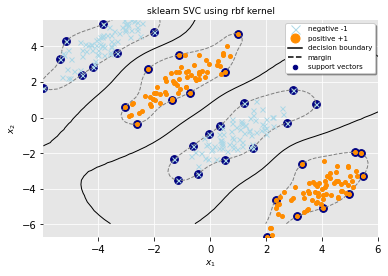

sklearn svc accuracy score is 1.0
sklearn svc found 38 support vectors from 300 examples
sklearn svc b is [0.00216921]


In [38]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=GaussianKernel(gamma='auto'), C=1, 
              optimizer=SMOClassifier, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

print()

svc = DualSVC(kernel=GaussianKernel(gamma='auto'), C=1, 
              optimizer='cvxopt', verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'cvxopt svc accuracy score is {svc.score(X_test, y_test)}')
print(f'cvxopt svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svc b is {svc.intercept_}')

print()

svc = SKLSVC(kernel='rbf', gamma='auto', C=1)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.12) is:

In [39]:
from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import GaussianKernel
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-1.7948e+01	ub: -1.7948e+01 - pcost:  1.7948e+01 - gap:  2.0000e+00
   1	   1	 7.0144e+01	ub:  1.7948e+01 - pcost:  1.7948e+01 - gap:  0.0000e+00

CPU times: user 568 ms, sys: 699 ms, total: 1.27 s
Wall time: 384 ms


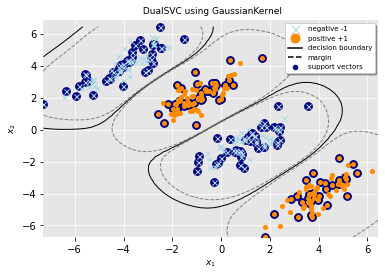

svc accuracy score is 1.0
svc found 165 support vectors from 300 examples
svc b is 0.5125006714032071


In [40]:
X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = DualSVC(kernel=GaussianKernel(gamma='auto'), C=1, 
              optimizer=AdaGrad, verbose=True)
%time svc.fit(X_train, y_train)
plot_svm_hyperplane(svc, X_train, y_train)
print(f'svc accuracy score is {svc.score(X_test, y_test)}')
print(f'svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'svc b is {svc.intercept_}')

##### Support Vector Regression

In [41]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.smo import SMORegression
from optiml.ml.svm.kernels import GaussianKernel
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from sklearn.svm import SVR as SKLSVR
from sklearn.model_selection import train_test_split

iter	 cost
   0	-1.9256e+00
   2	-2.0759e+00
   4	-2.1433e+00
   6	-2.1616e+00
   8	-2.1638e+00
  10	-2.1651e+00
  12	-2.1663e+00
  14	-2.1683e+00
  16	-2.1687e+00
  18	-2.1688e+00
  20	-2.1690e+00
  22	-2.1691e+00
  24	-2.2188e+00
  26	-2.2277e+00
  28	-2.2278e+00
  30	-2.2289e+00
  32	-2.2292e+00
  34	-2.2293e+00
  36	-2.2293e+00

CPU times: user 619 ms, sys: 751 ms, total: 1.37 s
Wall time: 394 ms


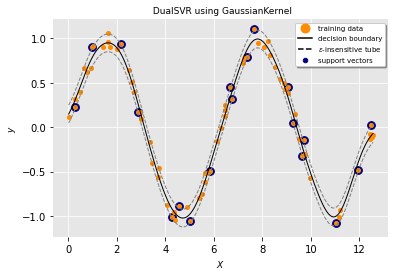

svr r2 score is 0.9888205130479949
svr found 19 support vectors from 75 examples
svr b is -0.0006708129803801938

     pcost       dcost       gap    pres   dres
 0:  4.2236e+00 -1.7394e+02  2e+02  4e-17  7e-15
 1:  3.3939e+00 -9.9155e+00  1e+01  1e-16  9e-15
 2: -1.2691e+00 -3.2637e+00  2e+00  2e-16  7e-15
 3: -2.0014e+00 -2.5227e+00  5e-01  2e-16  3e-15
 4: -2.1569e+00 -2.3234e+00  2e-01  2e-16  2e-15
 5: -2.2128e+00 -2.2491e+00  4e-02  2e-16  1e-15
 6: -2.2260e+00 -2.2337e+00  8e-03  2e-16  1e-15
 7: -2.2292e+00 -2.2299e+00  7e-04  2e-16  1e-15
 8: -2.2295e+00 -2.2295e+00  2e-05  2e-16  1e-15
 9: -2.2295e+00 -2.2295e+00  5e-07  2e-16  1e-15
Optimal solution found.

CPU times: user 117 ms, sys: 132 ms, total: 249 ms
Wall time: 62.1 ms


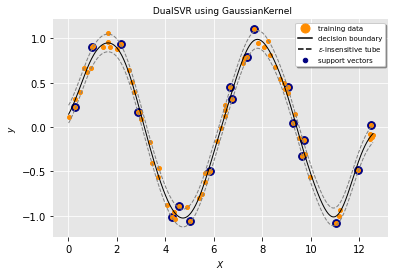

cvxopt svr r2 score is 0.9886525513403863
cvxopt svr found 19 support vectors from 75 examples
cvxopt svr b is -0.004490864602625174

CPU times: user 1.03 ms, sys: 0 ns, total: 1.03 ms
Wall time: 1.04 ms


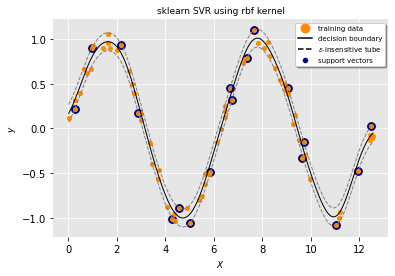

sklearn svr r2 score is 0.988723190582149
sklearn svr found 18 support vectors from 75 examples
sklearn svr b is [0.02027178]


In [42]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=GaussianKernel(gamma='auto'), epsilon=0.1, 
              C=1, optimizer=SMORegression, verbose=2)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

print()

svr = DualSVR(kernel=GaussianKernel(gamma='auto'), epsilon=0.1, 
              C=1, optimizer='cvxopt', verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'cvxopt svr r2 score is {svr.score(X_test, y_test)}')
print(f'cvxopt svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'cvxopt svr b is {svr.intercept_}')

print()

svr = SKLSVR(kernel='rbf', gamma='auto', C=1)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')

The solution of the *Lagrangian dual* relaxation according to (2.12) is:

In [43]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import GaussianKernel
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from optiml.opti.unconstrained.stochastic import AdaGrad

from sklearn.model_selection import train_test_split

epoch	iter	 cost	
   0	   0	-8.0421e+01	ub: -8.0421e+01 - pcost:  8.0421e+01 - gap:  2.0000e+00
   1	   1	 1.5054e+03	ub:  8.0421e+01 - pcost:  8.0421e+01 - gap:  0.0000e+00

CPU times: user 218 ms, sys: 352 ms, total: 570 ms
Wall time: 175 ms


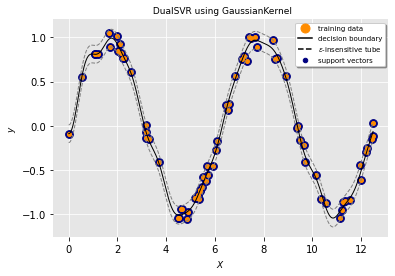

svr r2 score is 0.9869859278729558
svr found 75 support vectors from 75 examples
svr b is 0.13474271789878897


In [44]:
X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = DualSVR(kernel=GaussianKernel(gamma='auto'), epsilon=0.1, 
              C=1, optimizer=AdaGrad, verbose=True)
%time svr.fit(X_train, y_train)
plot_svm_hyperplane(svr, X_train, y_train)
print(f'svr r2 score is {svr.score(X_test, y_test)}')
print(f'svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'svr b is {svr.intercept_}')

## Conclusions

For what about the svm formulations, it is known, in general, that the *primal* formulation, is suitable for large linear training since the complexity of the model grows with the number of features or, more in general, when the number of examples $n$ is much larger than the number of features $m$, $n \gt\gt m$; while the *dual* formulation, is more suitable in case the number of examples $n$ is less than the number of features $m$, $n \lt m$, since the complexity of the model is dominated by the number of examples.

From all these experiments we can see that *cvxopt* significantly underperform the *sklearn* implementation in terms of time since it is a general-purpose QP solver and it doesn't exploit the structure of the problem. In the field of numerical optimization, it is known that if you want better performance you should use a better model, so ad-hoc implementations able to embed the knowledge of the problem are welcome. 
Despite, the *custom* implementation does not overperform the *cvxopt* probably due to the tradeoff generated from the different core implementations, Python and C respectively.
For these reasons, *sklearn* provides the better results in terms of time wrt the other implementations since it is designed to work in large scale context and its core is implemented in C.

Import consideration involves the number of support vector machines: the *Lagrangian dual* formulation tends to select all the data points as support vectors, so it makes the model unable to generalize. In fact, the scores are lower wrt the equivalent *Wolfe dual* formulation.

## References

[[1]](#ref-1) [J. Duchi, E. Hazan, Y. Singer. _Adaptive Subgradient Methods for Online Learning and Stochastic Optimization._](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)

[[2]](#ref-2) [J.C. Platt. _Sequential Minimal Optimization: A Fast Algorithm for Training Support Vector Machines._](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf)

[[3]](#ref-3) [S.S. Keerthi, S.K. Shevade, C. Bhattacharyya, K.R.K. Murthy. _Improvements to Platt's SMO Algorithm for SVM Classifier Design._](http://web.cs.iastate.edu/~honavar/keerthi-svm.pdf)

[[4]](#ref-4) [G.W. Flake, S. Lawrence. _Efficient SVM Regression Training with SMO._](https://link.springer.com/content/pdf/10.1023/A:1012474916001.pdf)

[[5]](#ref-5) [S.K. Shevade, S.S. Keerthi, C. Bhattacharyya, K.R.K. Murthy. _Improvements to SMO Algorithm for SVM Regression._](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.27.8961&rep=rep1&type=pdf)

[[6]](#ref-6) [C.W. Hsu, C.J. Lin. _A simple decomposition method for support vector machines._](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.126.4700&rep=rep1&type=pdf)